# Using nn.Sequential

Am creat un model cu două layere de tipul `nn.Linear()` în funcție de datele cu care se lucrează momentan. O să recapitulăm această parte până în acest moment.

In [1]:
# importing the libraries
import torch
from torch import nn

import pandas as pd
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
# Creating the dataset
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [3]:
df = pd.DataFrame({"X1": X[:, 0],
                   "X2": X[:, 1],
                   "label": y})

df.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


<Axes: xlabel='X1', ylabel='X2'>

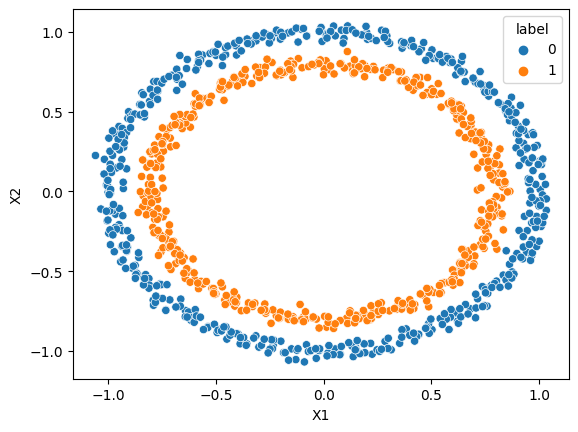

In [4]:
sns.scatterplot(data=df, x="X1", y="X2", hue="label")

In [5]:
# transform the data into tesors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [6]:
# split the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# create the model
class CircleModel(nn.Module):

    def __init__(self):

        super().__init__()

        self.linear_layer1 = nn.Linear(in_features=2, out_features=5)
        self.linear_layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.linear_layer2(self.linear_layer1(x))


In [8]:
# create an instance of the model
torch.manual_seed(42)

model_02 = CircleModel()
model_02

CircleModel(
  (linear_layer1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer2): Linear(in_features=5, out_features=1, bias=True)
)

Ceea ce este cel mai complicat în cadrul acestui model este prezenta în metoda **forward()** și anume cum trebuie să returnăm layerele modelului pentru ca computația să se realizeze corect. Din moment ce date intră în primul layer, se fac calculele necesare, iar outputul primului layer este folosit în cel de al doilea layer, atunci aceste calcule se fac secvențial. Datorită acestui fapt, putem să utilizăm un alt modul din `torch.nn` pentru a crea un model secvențial (folosind `nn.Sequential()`)

Există două metode de a crea un astfel de model, primul este să instanțiem o nouă versiune de model utilizând direct `nn.Sequential()` în cadrul căruia să creem cele două layere, iar cea de a doua metodă este să creem această secvență de calcule în cadrul unui model precum cel de sus și să atribuim rezultatul unui atribut al modelului.

1. Crearea unui model prin instanțiere

In [9]:
model_03 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

In [10]:
model_03

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [11]:
model_02

CircleModel(
  (linear_layer1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer2): Linear(in_features=5, out_features=1, bias=True)
)

După cum se poate observa din ceea ce este prezentat mai sus, cele două modele connțin același tip de informații, adică două layere de tip `nn.Linear()`. Metoda prin care am creat al doilea model este una mult mai simplă și mai rapidă. Este totuși necesar să știm că există ambele variante de a crea un model, iar prin cadrul primei metode (cea pe care am utilizat-o până în acest moment) este mai clar cum anume funcționează o rețea neuronală. Varianta a doua este mai utilă în momentul în care dorim să returnăm aceste computații care se realizează în cadrul acestor layere deoarece avem de returnat doar acel model secvențial, nu trebuie să apelăm un hidden layer în cadrul altuia. Pentru a putea profita ce aceast avantaj trebuie să creem acel `nn.Sequential()` în cadrul clasei respective

In [12]:
class CircleModelV2(nn.Module):

    def __init__(self):

        super().__init__()

        self.layer = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )

    def forward(self, x):
        return self.layer(x)

In [13]:
model_04 = CircleModelV2()
model_04

CircleModelV2(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

Cum am creat modelul de mai sus, acuma în cadrul metodei **forward()** trebuie să returnăm doar acel nou atribut pe care l-am creat (*self.layer*), atribut ce conține o secvență de două layere de tip Linear (`nn.Sequential(nn.Linear(), nn.Linear())`)


## Recapitulare

În cadrul lecții curente am învățat următoarele:

1. Cum să creem un model simplu utilizând nn.Sequential()
```python
from torch import nn

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=2)
)
```

2. Cum să implementăm acest model secvențial în cadrul unei clase
```python
from torch import nn

class CircleMolde(nn.Module):

    def __init__(self):
        super().__init__()

        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
        )

    def forward(self, x):
        return self.two_linear_layers(x)
```